https://unit8co.github.io/darts/examples/03-FFT-examples.html

https://medium.com/unit8-machine-learning-publication/time-series-forecasting-using-past-and-future-external-data-with-darts-1f0539585993

In [ ]:
#pip install darts

In [ ]:
#!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl
#!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchtext==0.10.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html
#!pip install pyyaml==5.4.1

In [ ]:
#pip install darts
# necessary packages:
#!pip install -U darts
#!pip install -U optuna


In [ ]:
#pip install missingno
#pip install darts

In [ ]:
# fix python path if working locally
#from utils import fix_pythonpath_if_working_locally

#fix_pythonpath_if_working_locally()

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from darts import TimeSeries
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Theta
from darts.metrics import mae, rmse, mape, r2_score
from darts.utils.missing_values import fill_missing_values
from darts.utils.likelihood_models import GaussianLikelihood, QuantileRegression,DirichletLikelihood
from darts.explainability.shap_explainer import ShapExplainer
from darts.utils import timeseries_generation as tg
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    RegressionModel,
    TFTModel
)


import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [5]:
D = pd.read_excel('DN_Bcs_plant_control_abajo_31032023.xlsx', index_col=0)
D.index = pd.to_datetime(D.index)
D

,f,Zc,pbh,pwh,q,fq,Zc.1,Pin,H,P,I,qc,5
1970-01-01 00:00:00.000000000,1.000000,0.979167,0.000000,0.122887,1.000000,1.000000,0.957924,0.000000,1.000000,1.000000,1.000000,0.996151,1.000000
1970-01-01 00:00:00.000000001,0.974359,0.958333,0.026762,0.129952,0.984941,0.974355,0.939762,0.028269,0.967781,0.962490,0.963998,1.000000,0.972615
1970-01-01 00:00:00.000000002,0.948718,0.937500,0.041046,0.133822,0.962968,0.946285,0.919533,0.045066,0.945047,0.922883,0.915382,0.989154,0.959273
1970-01-01 00:00:00.000000003,0.923077,0.916667,0.060466,0.135436,0.950293,0.920762,0.898604,0.059834,0.909278,0.888633,0.883073,0.969814,0.936822
1970-01-01 00:00:00.000000004,0.897436,0.895833,0.076690,0.139178,0.934950,0.895929,0.879541,0.079676,0.877272,0.855436,0.850836,0.960315,0.922367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000044995,0.333326,0.046046,0.861918,0.677290,0.143903,0.340951,0.049890,0.868475,0.384040,0.167262,0.166829,0.110748,0.138317
1970-01-01 00:00:00.000044996,0.333326,0.046046,0.862685,0.678123,0.143885,0.342365,0.048172,0.866552,0.384353,0.170651,0.166814,0.106170,0.136105
1970-01-01 00:00:00.000044997,0.333326,0.046046,0.862266,0.678874,0.142193,0.339458,0.046329,0.873740,0.382274,0.165300,0.165950,0.101255,0.141168
1970-01-01 00:00:00.000044998,0.333326,0.046046,0.863338,0.679205,0.143450,0.338376,0.050273,0.876942,0.375539,0.167214,0.168907,0.112018,0.141175


In [6]:
column_indices = {name: i for i, name in enumerate(D.columns)}
column_indices
n = len(D)
num_features = D.shape[1]

#train DATA
train_df = D[0:int(n)] #100% 
train_df = train_df.transpose()
train_df = train_df.drop(['pbh','pwh','fq','Zc.1','I','qc','P','f','Zc'])
train_df = train_df[:-1]
train_df = train_df.transpose()
train_df
train_df1 =  train_df.copy()
train_df1

,q,Pin,H
1970-01-01 00:00:00.000000000,1.000000,0.000000,1.000000
1970-01-01 00:00:00.000000001,0.984941,0.028269,0.967781
1970-01-01 00:00:00.000000002,0.962968,0.045066,0.945047
1970-01-01 00:00:00.000000003,0.950293,0.059834,0.909278
1970-01-01 00:00:00.000000004,0.934950,0.079676,0.877272
...,...,...,...
1970-01-01 00:00:00.000044995,0.143903,0.868475,0.384040
1970-01-01 00:00:00.000044996,0.143885,0.866552,0.384353
1970-01-01 00:00:00.000044997,0.142193,0.873740,0.382274
1970-01-01 00:00:00.000044998,0.143450,0.876942,0.375539


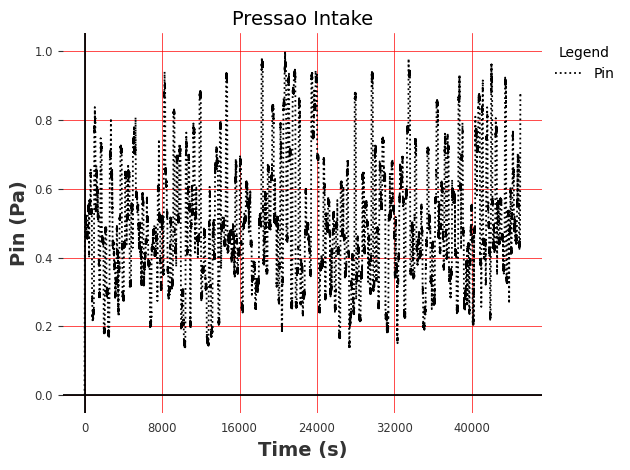

In [13]:
train_df1 = train_df1.reset_index(drop=True)
#plot each series
plt.plot(train_df1['Pin'], label='Pin', color='black', linestyle =':')
# adding title to the plot
plt.title('Pressao Intake',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Pin (Pa)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(train_df), 8000))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

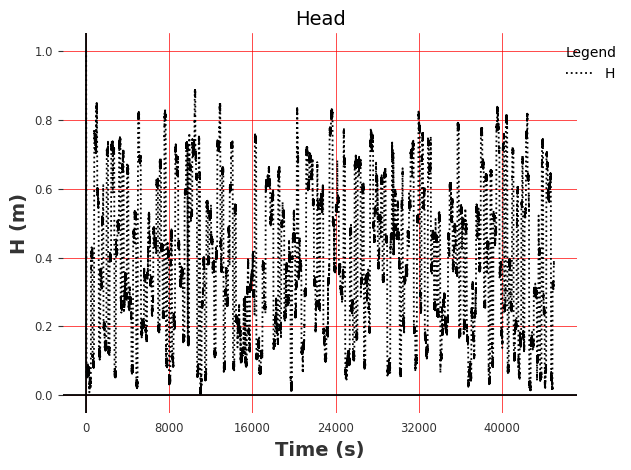

In [14]:
#plot each series
plt.plot(train_df1['H'], label='H', color='black', linestyle =':')
# adding title to the plot
plt.title('Head',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('H (m)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1.1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(train_df), 8000))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

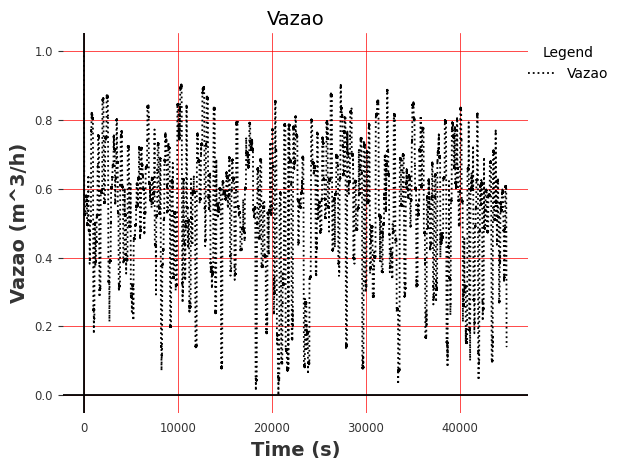

In [15]:
#plot each series
plt.plot(train_df1['q'], label='Vazao', color='black', linestyle =':')
# adding title to the plot
plt.title('Vazao',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Vazao (m^3/h)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1.2,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(train_df), 10000))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

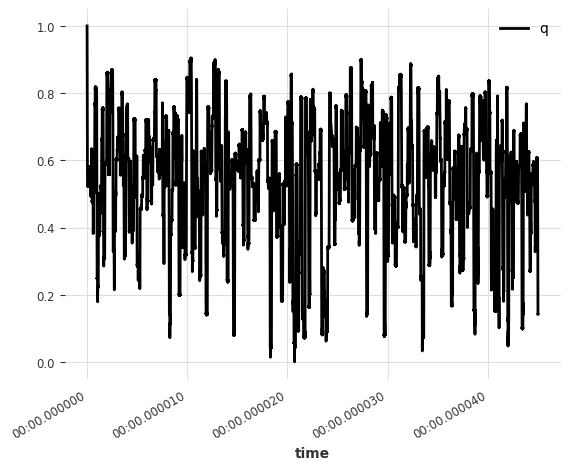

In [10]:
train_TS = TimeSeries.from_dataframe(train_df) 
train_TS
train_TS['q'].plot()

45000

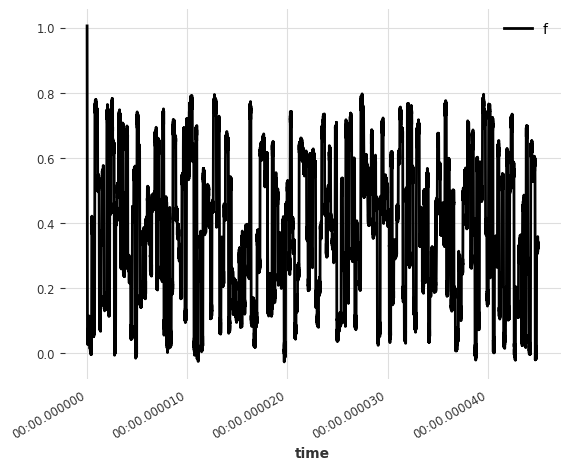

In [17]:
NOISE_DISTANCE = 0.01
SAMPLE_SIZE = len(train_df)
np.random.seed(42)
noise = tg.gaussian_timeseries(length=SAMPLE_SIZE, std=NOISE_DISTANCE)

f_df = D[0:int(n)] #30%
f_df = f_df.transpose()
f_df = f_df.drop(['pbh','pwh','fq','Zc.1','I','qc','P','Zc','H','Pin','q'])
f_df = f_df[:-1]
f_df = f_df.transpose()
f_df
f_TS = TimeSeries.from_dataframe(f_df) 
f_TS = f_TS + noise
f_TS.plot()
len(f_TS)


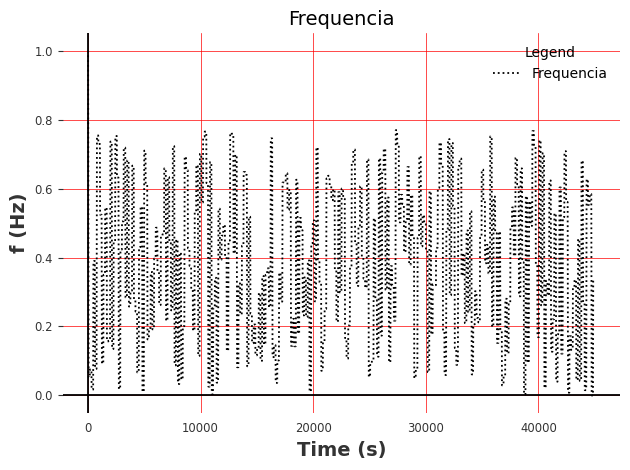

In [22]:
f_df
f_df = f_df.reset_index(drop=True)
#plot each series
plt.plot(f_df, label='Frequencia', color='black', linestyle =':')
# adding title to the plot
plt.title('Frequencia',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('f (Hz)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(f_df), 10000))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

45000

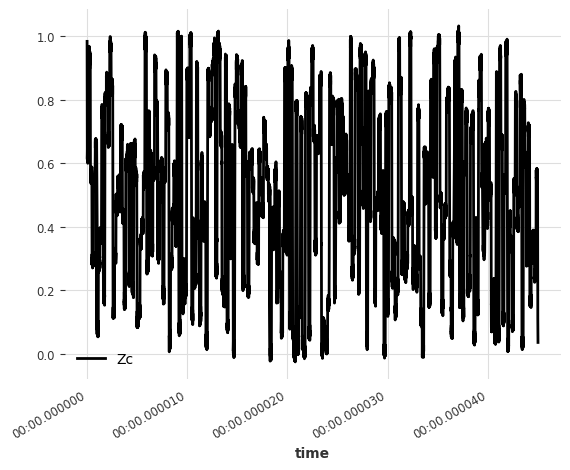

In [19]:
Zc_df = D[0:int(n)] #30%
Zc_df = Zc_df.transpose()
Zc_df = Zc_df.drop(['pbh','pwh','fq','Zc.1','I','qc','P','f','H','Pin','q'])
Zc_df = Zc_df[:-1]
Zc_df = Zc_df.transpose()
Zc_df
Zc_TS = TimeSeries.from_dataframe(Zc_df) 
Zc_TS = Zc_TS + noise
Zc_TS.plot()
len(Zc_TS)

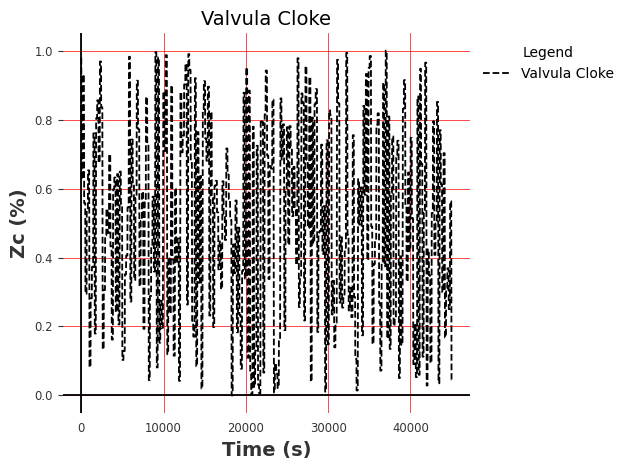

In [21]:
Zc_df = Zc_df.reset_index(drop=True)
#plot each series
plt.plot(Zc_df, label='Valvula Cloke', color='black', linestyle ='--')
# adding title to the plot
plt.title('Valvula Cloke',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Zc (%)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(Zc_df), 10000))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()


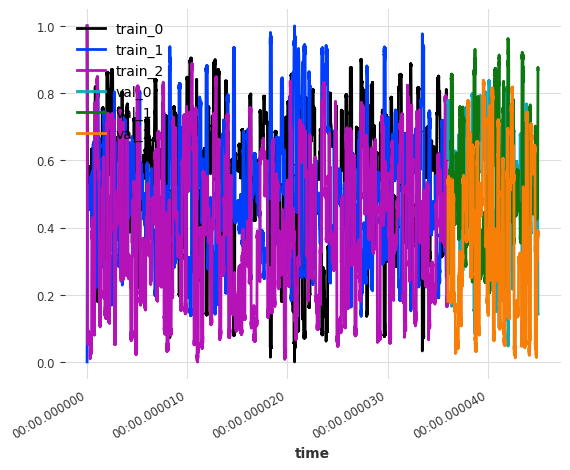

In [8]:
train, val = train_TS.split_before(0.8)
trainZc_TS, valZc_TS= Zc_TS.split_before(0.8)
trainf_TS, valf_TS= f_TS.split_before(0.8)
train.plot(label="train")
val.plot(label="val")

Constantes basicas

In [9]:
len(val)

9001

In [10]:
sep = 800

In [11]:
def eval_model(model, past_covariates=None, future_covariates=None):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, with a horizon of 10 steps:
    backtest = model.historical_forecasts(series=train_TS, 
                                          past_covariates=past_covariates,
                                          start=0.8, 
                                          retrain=False,
                                          verbose=False, 
                                          forecast_horizon=10)
    
    train_TS[-len(backtest)-100:].plot()
    backtest.plot(label='backtest (n=10)')
    print('Backtest RMSE = {}'.format(rmse(train_TS, backtest)))
    return backtest

2 serie(f,Zc) like past covariates

In [ ]:
regr_model = RegressionModel(lags=[-20], lags_past_covariates=[-10])

regr_model.fit(train_TS, past_covariates=f_TS.stack(Zc_TS))

Predict_RM = eval_model(regr_model)


In [ ]:
regr_model.save("my_model_regression_14k.pkl")


In [ ]:
regr_model = RegressionModel.load("my_model_regression.pkl")

In [ ]:
#regr_model.residuals(train_TS, past_covariates=[-4, -3, -2, -1], forecast_horizon=1, retrain=True, verbose=False)
regr_model.extreme_lags


In [ ]:
regr_model.backtest(train_TS, past_covariates=[-4, -3, -2, -1] , num_samples=1, train_length=None, start=2, forecast_horizon=1, stride=1, retrain=True, overlap_end=False, last_points_only=False, metric= rmse, verbose=False)

In [ ]:
Pred_reg = eval_model(regr_model)

In [ ]:
df_Model_regr = Predict_RM.pd_dataframe()
#df_Model_NB.to_excel("pred_series2_Nbeats.xlsx")
df_Target = val.pd_dataframe()
df_Target 

#df_1.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_5 = pd.merge(df_Model_regr, df_Target, on ='time')
df_M_5.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_5.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_5['q_err'] = df_M_5['q_Pred'] - df_M_5['q_Val']
df_M_5['Pin_err'] = df_M_5['Pin_Pred'] - df_M_5['Pin_Val']
df_M_5['H_err'] = df_M_5['H_Pred'] - df_M_5['H_Val']
df_M_5 =  df_M_5.reset_index(drop=True)
df_M_5


In [ ]:
#plot each series
plt.plot(df_M_5['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_5['q_Val'], label='q_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Vaçao Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 4000))
plt.show()

In [ ]:
plt.hist(df_M_5['q_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Vaçao')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.2) #y-axis line
plt.xlabel('Erro',fontsize=12)
plt.ylabel('Frequência ',fontsize=12)
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_5['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_5['H_Val'], label='H_Val', color='blue')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linestyle='-', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 4000))
plt.show()

In [ ]:
plt.hist(df_M_5['H_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Head')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.2) #y-axis line
plt.xlabel('Erro',fontsize=12)
plt.ylabel('Frequência ',fontsize=12)
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_5['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_5['Pin_Val'], label='Pin_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 4000))
plt.show()

In [ ]:
plt.hist(df_M_5['Pin_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Pressao Intake')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.2) #y-axis line
plt.xlabel('Erro',fontsize=12)
plt.ylabel('Frequência ',fontsize=12)
plt.show() 

In [ ]:
plt.plot(df_M_5['Pin_err'], label='Erro Pin', color='blue')
# adding title to the plot
plt.title('Erro Pin',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Erro Pin',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 4000))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:

pred_series = regr_model.predict(n=10,series = train)
df_Model_regr = pred_series.pd_dataframe()
df_Target = val.pd_dataframe()
df_Target 

df_1 = df_Target.iloc[:10,:]
df_2 = df_Target.iloc[10:,:]

df_M_8 = pd.merge(df_Model_regr, df_1, on ='time')
df_M_8.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_8.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_8['q_err'] = df_M_8['q_Pred'] - df_M_8['q_Val']
df_M_8['Pin_err'] = df_M_8['Pin_Pred'] - df_M_8['Pin_Val']
df_M_8['H_err'] = df_M_8['H_Pred'] - df_M_8['H_Val']
df_M_8 =  df_M_8.reset_index(drop=True)
df_M_8


In [ ]:
#plot each series
plt.plot(df_M_8['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_8['q_Val'], label='q_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Vaçao Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_8), 1))
plt.show()

In [ ]:
#plot each series
plt.plot(df_M_8['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_8['H_Val'], label='H_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_8), 1))
plt.show()

In [ ]:
#plot each series
plt.plot(df_M_8['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_8['Pin_Val'], label='Pin_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linewidth=1)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_8), 1))
plt.show()

MODEL NBEATS TESTE

In [ ]:
model_BCS = NBEATSModel(
    input_chunk_length=30, 
    output_chunk_length=10, 
    n_epochs=300, 
    random_state=0,
    generic_architecture=False,
    num_stacks=8,
    num_blocks=6,
    num_layers=6,
    layer_widths=512,
    nr_epochs_val_period=1,
    batch_size=80,
    optimizer_kwargs={"lr": 1e-3},
    model_name="nbeats_run"
)

In [ ]:
model_BCS.fit(train_TS,
              past_covariates= f_TS.stack(Zc_TS), 
              verbose=False,
              epochs = 100)

In [ ]:
model_BCS.save("NBEATSModel_bcs_control_low_v1.pt")

In [ ]:
#model_BCS.save("NB_Model_v2.pt")

In [ ]:
pred_series = model_BCS.predict(n=10)

In [ ]:
pred_series2 = eval_model(model_BCS)


In [ ]:
df_Model_NB = pred_series2.pd_dataframe()
#df_Model_NB.to_excel("pred_series2_Nbeats.xlsx")
df_Target = val.pd_dataframe()
df_Target 

#df_1.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_3 = pd.merge(df_Model_NB, df_Target, on ='time')
df_M_3.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_3.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_3['q_err'] = df_M_3['q_Pred'] - df_M_3['q_Val']
df_M_3['Pin_err'] = df_M_3['Pin_Pred'] - df_M_3['Pin_Val']
df_M_3['H_err'] = df_M_3['H_Pred'] - df_M_3['H_Val']
df_M_3 =  df_M_3.reset_index(drop=True)
df_M_3


In [ ]:
#plot each series
plt.plot(df_M_3['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_3['q_Val'], label='q_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Vaçao Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_3), sep))
plt.show()

In [ ]:
plt.hist(df_M_3['q_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Vaçao')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.4) #y-axis line
plt.xlabel('Erro',fontsize=12)
plt.ylabel('Frequência ',fontsize=12)
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_3['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_3['H_Val'], label='H_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (nT)',fontsize=14)
plt.ylabel('H (m)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_3), sep))
plt.show()

In [ ]:
plt.hist(df_M_3['H_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Head')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.4) #y-axis line
plt.xlabel('Erro',fontsize=12)
plt.ylabel('Frequência ',fontsize=12)
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_3['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_3['Pin_Val'], label='Pin_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_3), sep))
plt.show()

In [ ]:
plt.hist(df_M_3['Pin_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Pressao Intake')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.4) #y-axis line
plt.xlabel('Erro',fontsize=12)
plt.ylabel('Frequência ',fontsize=12)
plt.show() 

In [ ]:
plt.plot(df_M_3['Pin_err'], label='Erro Pin', color='blue')
# adding title to the plot
plt.title('Erro Pin',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Erro Pin',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_3), sep))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
#shap_explain = ShapExplainer(model_BCS)
#shap_explain.summary_plot()

In [ ]:
my_model = BlockRNNModel(
    model="LSTM",
    hidden_dim=10,
    dropout=0.2,
    batch_size=16,
    n_epochs=300,
    model_name="BCS_PinH_RNN",
    input_chunk_length=30,
    output_chunk_length=10, 
    force_reset=True,
    optimizer_kwargs={"lr": 1e-3}
)

In [ ]:
my_model.fit(train_TS,
            past_covariates= f_TS.stack(Zc_TS), 
            verbose=False,
            epochs = 200)

In [ ]:
Predict_RM = eval_model(my_model)

In [ ]:
Predict_RM

In [ ]:
my_model.save("my_model_LSTM_control_low_v1.pt")

In [ ]:
df_Model_RM = Predict_RM.pd_dataframe()
#df_Model_RM.to_excel("pred_series2_RNN80N.xlsx")
df_Target = val.pd_dataframe()
df_Target 

#df_1.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_4 = pd.merge(df_Model_RM, df_Target, on ='time')
df_M_4.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_4.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_4['q_err'] = df_M_4['q_Pred'] - df_M_4['q_Val']
df_M_4['Pin_err'] = df_M_4['Pin_Pred'] - df_M_4['Pin_Val']
df_M_4['H_err'] = df_M_4['H_Pred'] - df_M_4['H_Val']
df_M_4 =  df_M_4.reset_index(drop=True)
df_M_4

In [ ]:
#plot each series
plt.plot(df_M_4['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_4['q_Val'], label='q_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Vaçao Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_4), sep))
plt.show()

In [ ]:
plt.hist(df_M_4['q_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Vaçao')
plt.grid(True)
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_4['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_4['H_Val'], label='H_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_4), 600))
plt.show()

In [ ]:
plt.hist(df_M_4['H_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Head')
plt.grid(True)
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_4['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_4['Pin_Val'], label='Pin_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_4), 800))
plt.show()

In [ ]:
plt.hist(df_M_4['Pin_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Pressao Intake')
plt.grid(True)
plt.show() 

train_TS.width

In [12]:
deeptcn = TCNModel(
    input_chunk_length=20,
    output_chunk_length=10,
    kernel_size=2,
    num_filters=6,
    dilation_base=2,
    dropout=0.2,
    random_state=0,
    optimizer_kwargs= {"lr": 1e-3},
    likelihood= GaussianLikelihood(),
)



In [13]:
deeptcn.fit(train_TS, past_covariates=f_TS.stack(Zc_TS), verbose=False,epochs = 100)

Backtest RMSE = 0.05678573311443701


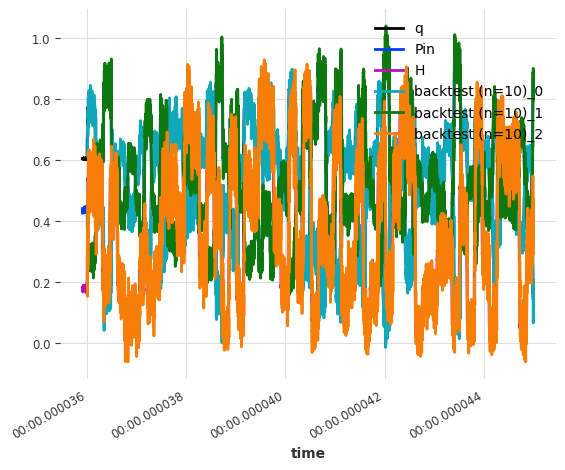

In [14]:
Predict_TCM = eval_model(deeptcn)

In [ ]:
deeptcn.save("my_model_TCN_control_low_v1.pt")

component,q_Pred,Pin_Pred,H_Pred,q_Val,Pin_Val,H_Val,q_err,Pin_err,H_err
0,0.623116,0.423472,0.263912,0.722604,0.343440,0.384391,-0.099488,0.080032,-0.120479
1,0.611662,0.432582,0.152990,0.735009,0.331890,0.410647,-0.123348,0.100692,-0.257658
2,0.669870,0.362339,0.304916,0.747086,0.316449,0.442512,-0.077216,0.045890,-0.137596
3,0.693878,0.364451,0.294584,0.760650,0.310221,0.457937,-0.066772,0.054229,-0.163353
4,0.681969,0.384798,0.259786,0.768352,0.296060,0.484842,-0.086383,0.088738,-0.225056
...,...,...,...,...,...,...,...,...,...
8987,0.191503,0.901642,0.321606,0.143903,0.868475,0.384040,0.047600,0.033167,-0.062434
8988,0.065831,0.873407,0.334489,0.143885,0.866552,0.384353,-0.078054,0.006854,-0.049863
8989,0.116809,0.881980,0.394205,0.142193,0.873740,0.382274,-0.025385,0.008240,0.011931
8990,0.138706,0.894559,0.395319,0.143450,0.876942,0.375539,-0.004744,0.017618,0.019780


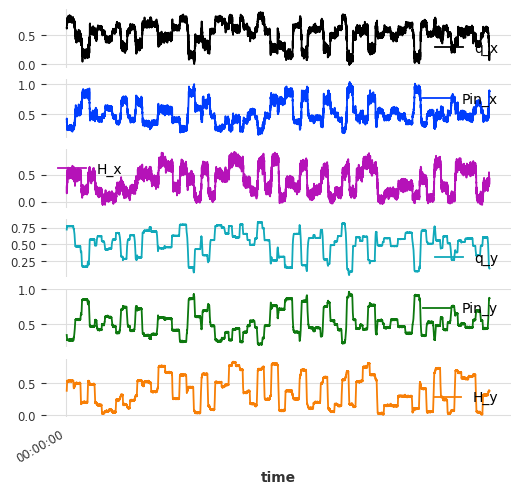

In [15]:
df_Model_TCM = Predict_TCM.pd_dataframe()
#df_Model_TCM.to_excel("pred_series3_TCM.xlsx")
df_Target = val.pd_dataframe()
df_Target 

#df_1.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_5 = pd.merge(df_Model_TCM, df_Target, on ='time')
df_M_5.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_5.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_5['q_err'] = df_M_5['q_Pred'] - df_M_5['q_Val']
df_M_5['Pin_err'] = df_M_5['Pin_Pred'] - df_M_5['Pin_Val']
df_M_5['H_err'] = df_M_5['H_Pred'] - df_M_5['H_Val']
df_M_5 =  df_M_5.reset_index(drop=True)
df_M_5

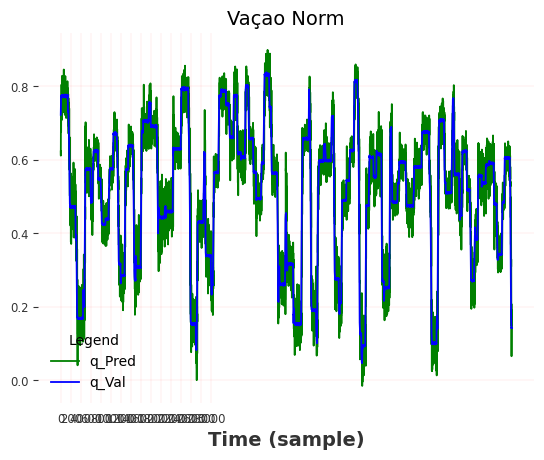

In [16]:
#plot each series
plt.plot(df_M_5['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_5['q_Val'], label='q_Val', color='blue')
# adding title to the plot
plt.title('Vaçao Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linestyle='-', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 200))
plt.show()

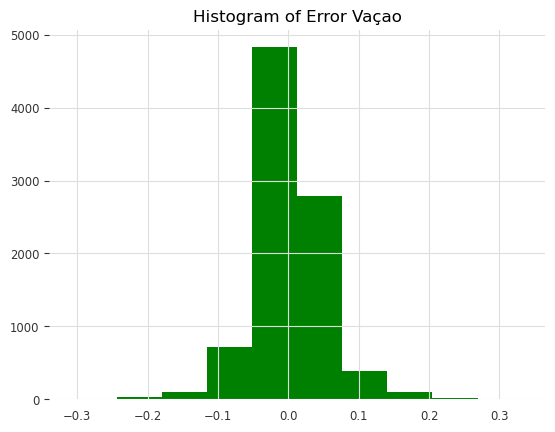

In [17]:
plt.hist(df_M_5['q_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Vaçao')
plt.grid(True)
plt.show() 

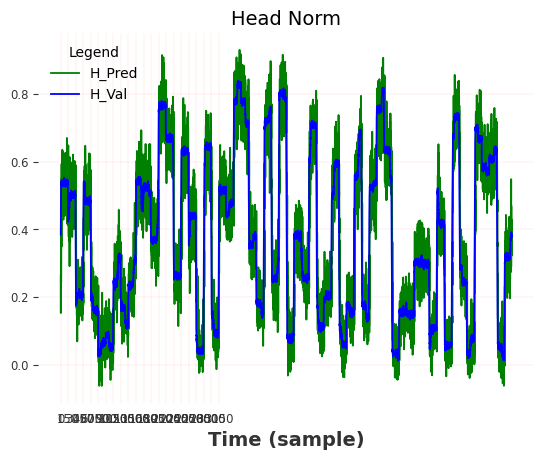

In [18]:
#plot each series
plt.plot(df_M_5['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_5['H_Val'], label='H_Val', color='blue')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linestyle='-', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 150))
plt.show()

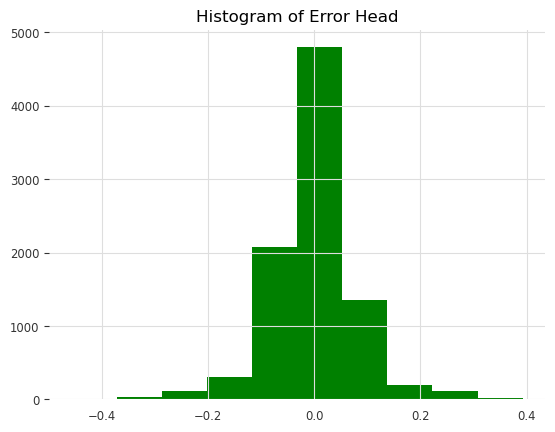

In [19]:
plt.hist(df_M_5['H_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Head')
plt.grid(True)
plt.show() 

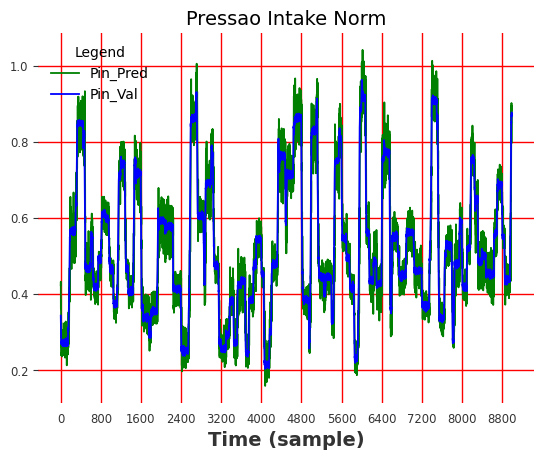

In [20]:
#plot each series
plt.plot(df_M_5['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_5['Pin_Val'], label='Pin_Val', color='blue')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend')
plt.grid(color='r', linestyle='-', linewidth=1)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 800))
plt.show()

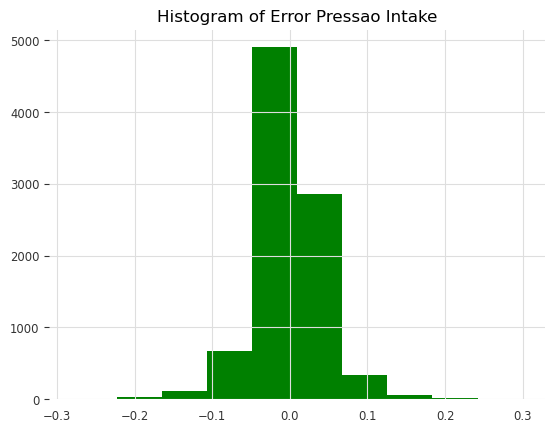

In [21]:
plt.hist(df_M_5['Pin_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Pressao Intake')
plt.grid(True)
plt.show() 

TFF like ESN
https://unit8co.github.io/darts/examples/13-TFT-examples.html

In [ ]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 10
forecast_horizon = 10

my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=300,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
)

In [ ]:
my_model.fit(train_TS, past_covariates = f_TS.stack(Zc_TS), future_covariates = f_TS.stack(Zc_TS), verbose=False)

In [ ]:
def eval_model(model, n, actual_series, val_series):
    num_samples = 10
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()
    return pred_series



In [ ]:
pred_seriesTFN = eval_model(my_model, 10, train, val)